#ECG: Identificación de ectópicos

## Leader Follower

## Libro Laguna - Sornmo, 5.6.1

El algoritmo Leader Follower es un algoritmo de agrupamiento incremental generalmente utilizado para agrupar grandes conjuntos de datos. Este algoritmo depende del orden y puede formar diferentes grupos según el orden en que se proporciona el conjunto de datos al algoritmo. El algoritmo consta de los siguientes pasos:


*   Paso 1: asigne el primer elemento de datos, P1, al grupo C1. Este conjunto de datos será el líder del grupo C1.
*   Paso 2: ahora muévase al siguiente elemento de datos, digamos P2, y calcule su distancia desde el líder P1. Si la distancia entre P2 y el líder P1 es menor que el umbral especificado por el usuario, entonces el punto de datos P2 se asigna a este grupo (Cluster C1). Si la distancia entre el líder P1 y el elemento de datos P2 es mayor que el umbral especificado por el usuario, forme un nuevo grupo C2 y asigne P2 a este nuevo grupo. P2 será el líder del grupo C2.
*  Paso 3: para todos los elementos de datos restantes, se calcula la distancia entre el punto de datos y el líder de los grupos. Si la distancia entre los elementos de datos y cualquiera de los líderes es menor que el umbral especificado por el usuario, el punto de datos se asigna a ese grupo. Sin embargo, si la distancia entre el punto de datos y cualquiera de los líderes del grupo es mayor que el umbral especificado por el usuario, se crea un nuevo grupo y ese punto de datos en particular se asigna a ese grupo y se considera el líder del grupo.
*  Paso 4: repita el paso 3 hasta que todos los elementos de datos estén asignados a los grupos.



# Aclaraciones:

Los elementos a clasificar $p_i$ serán los segmentos de señal correspondientes al complejo QRS. 

$p_i[n] = \begin{pmatrix}p_1 \\ p_2 \\ .\\ . \\ . \\ p_{N-1}\end{pmatrix} $

Cada centroide está caracterizado por su centro $\mu_l$ y dispersión $C_l$

La distancia utilizada en esta implementación es la distancia de Mahalanobis, que es una distancia euclidea normalizada por la varianza de los datos.

$d^2(p_i, \mu_l) = (p_i - \mu_l)^T C_l^{-1} (p_i - \mu_l)$



# Inicialización del algoritmo:

$\mu_1 = p_1$

$C_1 = kI$

# Asignación de clases:

$l = \arg \min_{j=1,2,..L} d^2(p_i,\mu_j)$



# Actualización:

$\mu_{l,k} = (1-\alpha)\mu_{l,k-1} + \alpha p_i$

$C_{l,k} = (1-\alpha)C_{l,k-1} + \alpha (p_i-\mu_l)(p_i-\mu_l)^T$

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
# Instalo librerias utiles

! pip install wfdb # https://github.com/MIT-LCP/wfdb-python
# https://wfdb.readthedocs.io/en/latest/

import wfdb 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


> Leo archivo 109 de Mitdb

In [4]:
path = '/content/drive/MyDrive/SIM2022Q2/señales/mitdb/109'
N = 20000
signal, fields = wfdb.io.rdsamp(path, 0, N)

anotaciones = wfdb.io.rdann(path, 'atr', 0, N)
print(anotaciones.symbol[:10])
print(len(anotaciones.sample), len(anotaciones.symbol))

['+', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
86 86


> Graficamos la señal

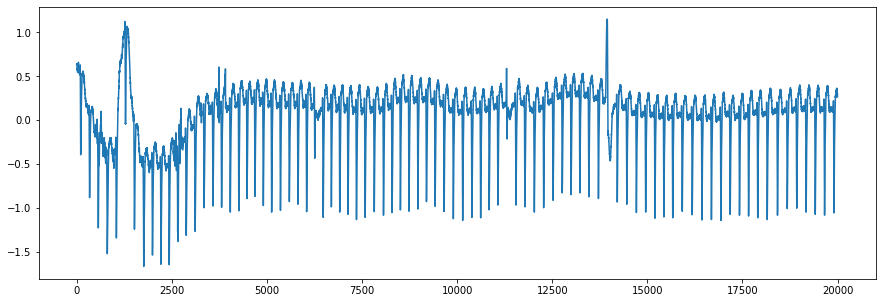

In [5]:
fs = fields['fs']
t = np.linspace(0,N/fs,N)
plt.figure(figsize=(15,5))
plt.plot(signal[:,1])

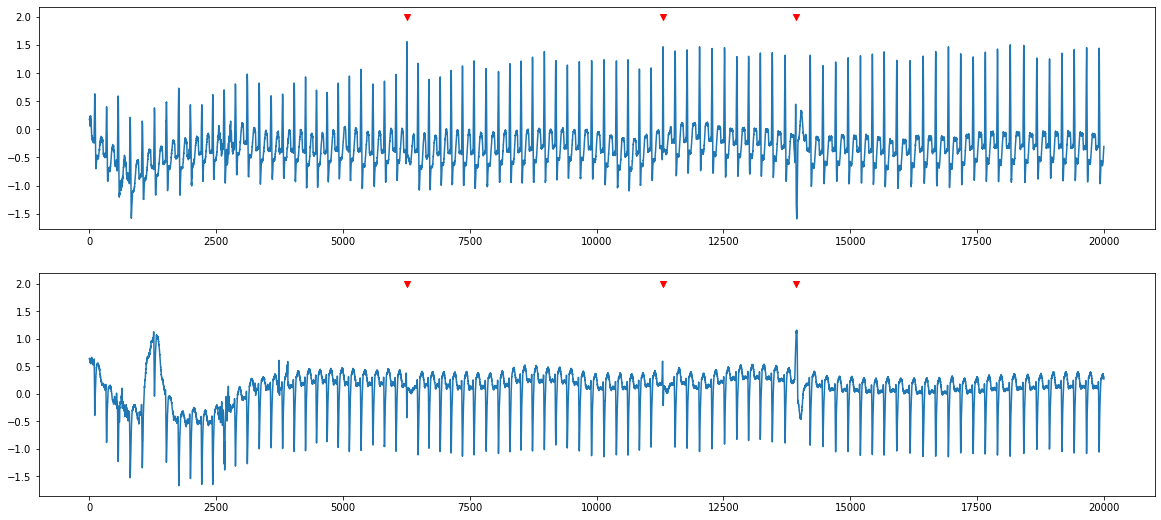

In [6]:
ann = wfdb.io.rdann(path, 'atr', sampfrom=0, sampto=N, return_label_elements=['symbol', 'description'])

# muestra las etiquetas estándar
latidos_anormales = [[]]
for i in range(len(ann.symbol)):
  if ann.symbol[i] != 'L':
    latidos_anormales.append([ann.sample[i],ann.symbol[i]])

latidos_anormales = latidos_anormales[2:]

fig, (ax1,ax2) = plt.subplots(2,1)

ax1.plot(signal[:,0])
ax1.scatter([i[0] for i in latidos_anormales],[2,2,2],marker='v',color='r')

ax2.plot(signal[:,1])
ax2.scatter([i[0] for i in latidos_anormales],[2,2,2],marker='v',color='r')

plt.gcf().set_size_inches(20, 9)

Arranco Leader Follower


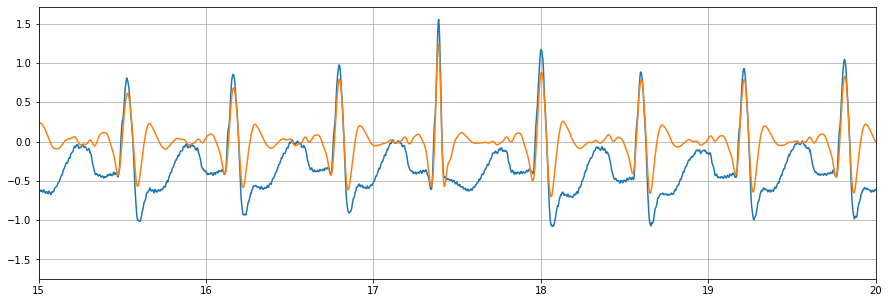

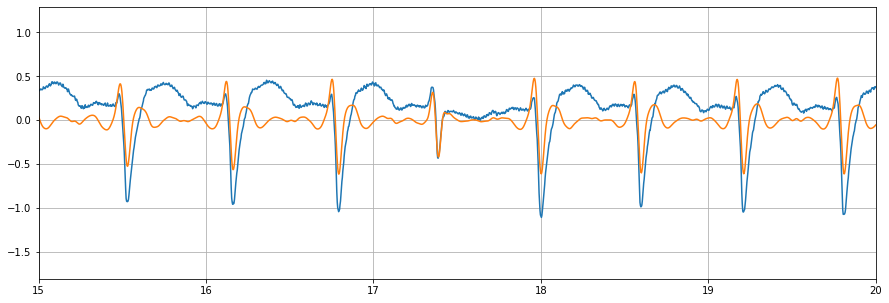

In [7]:
from scipy.signal import butter, sosfiltfilt, lfilter
signal1 = signal[:,0]
signal2 = signal[:,1]

filter = butter(5, [5, 25], 'band', fs=fs, output='sos')
filtered_signal1 = sosfiltfilt(filter, signal1)
filtered_signal2 = sosfiltfilt(filter, signal2)

plt.figure(figsize=(15,5))
plt.plot(t, signal1)
plt.plot(t, filtered_signal1)
plt.xlim(15, 20)
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(t, signal2)
plt.plot(t, filtered_signal2)
plt.xlim(15, 20)
plt.grid()
plt.show()
# 

In [8]:
# # Leader follower
# grupos_cent = [[0]]
# grupos_disp = [[[]]]
# grupos = 1
# etiquetas = np.array(len(anotaciones.sample)-1)
# lat = len(anotaciones.sample)

# qrs = np.zeros((lat-1,2),dtype='int')
# n_mitad = int(np.ceil(0.06*fs))
# y = np.zeros(N)
# for i in range(1,lat):
#   qrs[i-1][0] = ann.sample[i] - n_mitad
#   qrs[i-1][1] = ann.sample[i] + n_mitad
#   for j in np.arange(qrs[i-1][0],qrs[i-1][1]+1):
#     y[j] = 1

In [9]:
# plt.figure(figsize=(15,5))
# plt.plot(signal1)
# plt.plot(filtered_signal1)
# plt.plot(y)
# plt.xlim((0,1000))
# plt.grid()
# plt.show()

# plt.figure(figsize=(15,5))
# plt.plot(signal2)
# plt.plot(filtered_signal2)
# plt.plot(y)
# plt.xlim((7000,9000))
# plt.grid()
# plt.show()


In [11]:
# qrs = np.zeros((latidos-1,2),dtype='int')
# n_mitad = int(np.ceil(0.08*fs))
# y = np.zeros(N)

# for i in range(1,latidos):
#   qrs[i-1][0] = ann.sample[i] - n_mitad
#   qrs[i-1][1] = ann.sample[i] + n_mitad
#   for j in np.arange(qrs[i-1][0],qrs[i-1][1]+1):
#     y[j] = 1

In [14]:
# grupos_cent = [[]]
# grupos_disp = [[[]]]
# grupo_p_i = np.zeros(latidos)
# grupos = 1
# etiquetas = np.array(len(anotaciones.sample)-1)
# latidos = len(anotaciones.sample)

# p_i = np.zeros((latidos,n_mitad*2))
# for i in np.arange(latidos-1):
#   p_i[i] = s_f_0[qrs[i][0]:qrs[i][1]]

# grupos_cent[0] = p_i[0]
# grupos_disp[0] = np.identity(n_mitad*2)
# grupo_p_i[0] = 1
# alpha = 0.25
# umbral_dist = 1.5
# distancia = np.zeros(0)
# dist = np.zeros(0)

# for lat in range(1,29):
  
#   for i in np.arange(grupos):
#     p_i_mean = p_i[lat] - grupos_cent[i]
#     distancia = np.append(distancia, np.dot(np.dot(p_i_mean,grupos_disp[i]),p_i_mean.T))
  
#   dist = np.append(dist,distancia)
  
#   if np.count_nonzero(distancia <= umbral_dist) == 0:
#     grupos = grupos + 1
#     grupos_disp.append(np.identity(n_mitad*2))
#     grupos_cent.append(p_i[lat])
#     grupo_p_i[lat] = grupos
  
#   else:
#     aux = np.argmin(distancia)
#     grupos_disp[aux] = (1-alpha)*grupos_disp[aux] + alpha*np.outer((p_i[lat] - grupos_cent[aux]),(p_i[lat] - grupos_cent[aux]))
#     grupos_cent[aux] = (1-alpha)*grupos_cent[aux] + alpha*p_i[lat]
#     grupo_p_i[lat] = aux+1
#   distancia = np.zeros(0)